mpg = Miles/(US) gallon

cyl = Number of cylinders

disp = Displacement (cu.in.)

hp = Gross horsepower

drat = Rear axle ratio

wt = Weight (lb/1000)

qsec = ¼ mile time

vs = V/S

am = Transmission (0 = automatic, 1 = manual)

gear = Number of forward gears

carb = Number of carburetors

In [1]:
import pandas as pd

df = pd.read_csv("mtcars.csv")

# 앞의 다섯 행 출력
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [2]:
# 뒤의 다섯 행 출력
df.tail()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [3]:
# 행의 개수, 열의 개수 철력
df.shape

(32, 12)

In [4]:
# 행의 개수 출력
df.shape[0]

32

In [5]:
# 이름 없는 열 이름 추가
df = df.rename(columns={"Unnamed: 0":"Car"})
df.head()

,Car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Car     32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [7]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [8]:
# gear feature의 개수
df['gear'].value_counts()

gear
3    15
4    12
5     5
Name: count, dtype: int64

In [9]:
# transmission feature의 개수
df['am'].value_counts()

am
0    19
1    13
Name: count, dtype: int64

In [10]:
# gear, transmission 조합별 차량 개수
df_grouped1 = df.groupby(['gear', 'am']).count()[['Car']].reset_index()

df_grouped2 = pd.crosstab(df['gear'], df['am'], values=df['Car'], aggfunc="count").fillna(0)


In [11]:
df_grouped1

,gear,am,Car
0,3,0,15
1,4,0,4
2,4,1,8
3,5,1,5


In [12]:
def auto(x):
    return 'auto ' if (x == 1) else ''

df_grouped1['gear_trans'] = df_grouped1['am'].map(auto) + df_grouped1['gear'].astype(str)

df_grouped1

,gear,am,Car,gear_trans
0,3,0,15,3
1,4,0,4,4
2,4,1,8,auto 4
3,5,1,5,auto 5


In [13]:
df_grouped2

am,0,1
gear,,
3,15.0,0.0
4,4.0,8.0
5,0.0,5.0


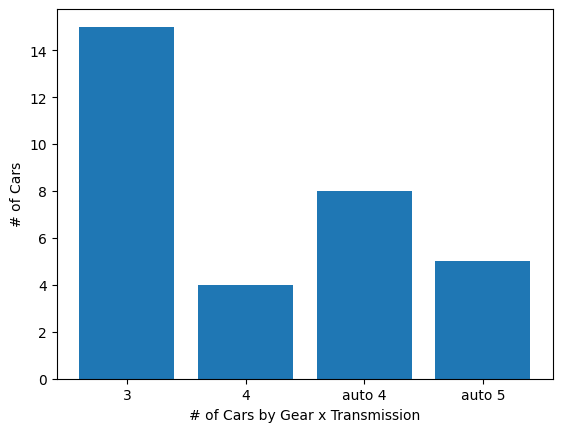

In [14]:
import matplotlib.pyplot as plt

plt.bar(df_grouped1.loc[:,'gear_trans'], df_grouped1['Car'])
plt.xlabel("# of Cars by Gear x Transmission")
plt.ylabel("# of Cars")
plt.show()

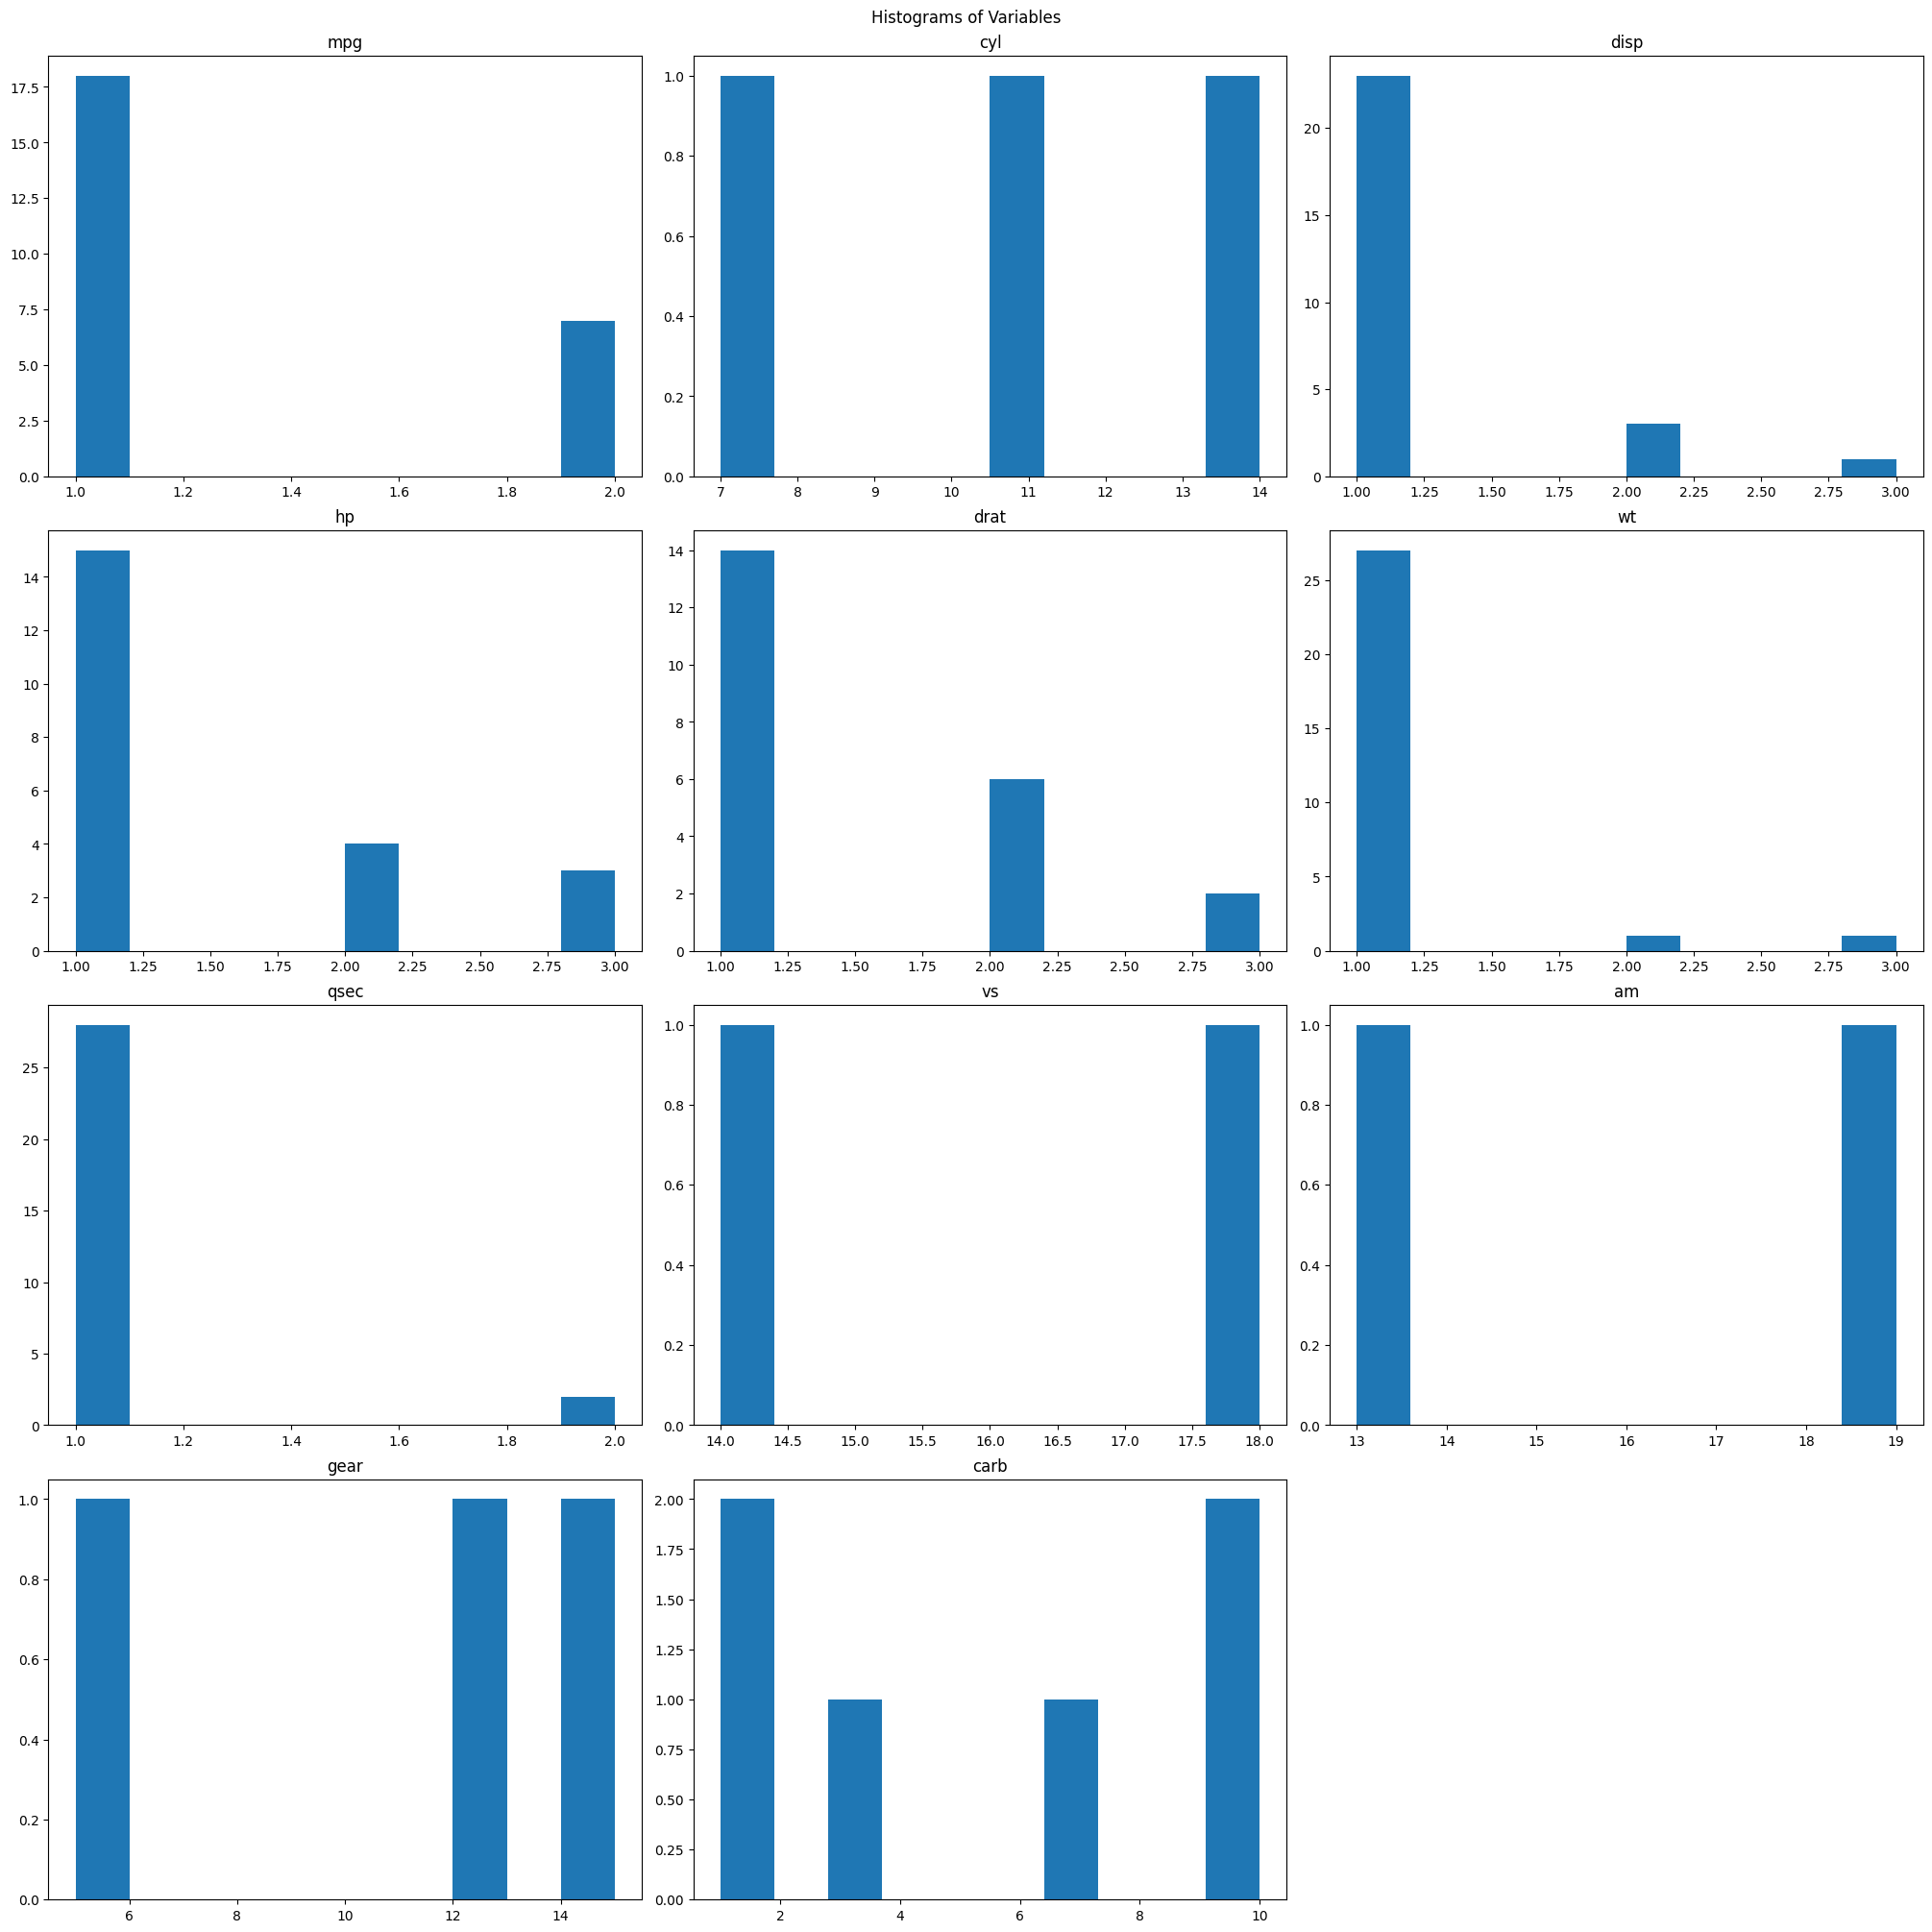

In [15]:

columns = df.columns
columns = columns.drop('Car')
plt.figure(figsize=(20,20), layout='constrained')
plt.suptitle("Histograms of Variables")


for i, column in enumerate(columns):
    y = df[column].value_counts().values
    plt.subplot(4, 3, i+1)
    plt.hist(y)
    plt.title(column)

plt.show()
# y = df['am'].value_counts().values
# plt.hist(y)

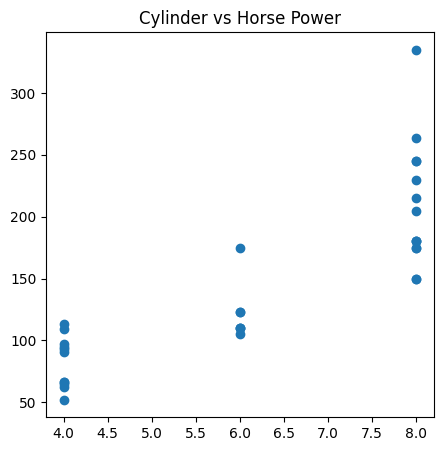

In [16]:
plt.figure(figsize=(5,5))
plt.title('Cylinder vs Horse Power')
plt.scatter(df['cyl'], df['hp'])

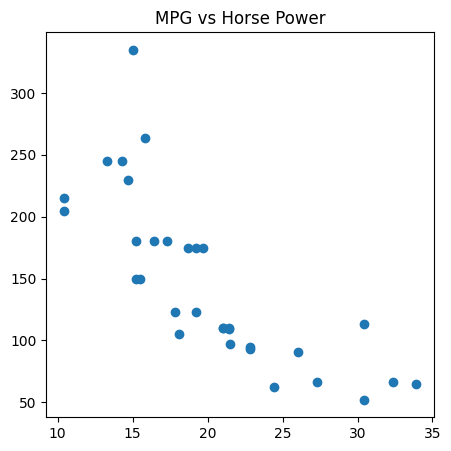

In [17]:
plt.figure(figsize=(5,5))
plt.title('MPG vs Horse Power')
plt.scatter(df['mpg'], df['hp'])

In [18]:
corr = df.corr(numeric_only=True)
corr

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


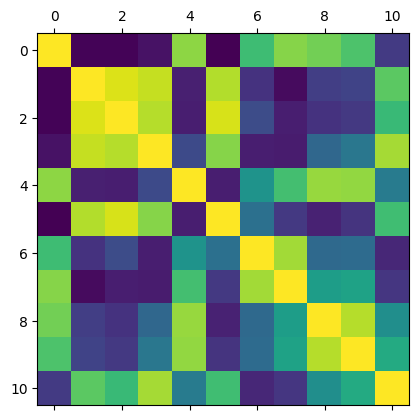

In [19]:
plt.matshow(corr)

In [20]:
# mpg의 상관관계
corr.iloc[1:,0]

cyl    -0.852162
disp   -0.847551
hp     -0.776168
drat    0.681172
wt     -0.867659
qsec    0.418684
vs      0.664039
am      0.599832
gear    0.480285
carb   -0.550925
Name: mpg, dtype: float64

In [21]:
# 실린더와 mpg
df.groupby('cyl')[['mpg']].mean().round(2)

,mpg
cyl,
4,26.66
6,19.74
8,15.10


In [22]:
# 기어와 mpg
df.groupby('gear')[['mpg']].mean().round(2)

,mpg
gear,
3,16.11
4,24.53
5,21.38


In [23]:
# qsec과의 상관관계
corr.loc[:,'qsec']

mpg     0.418684
cyl    -0.591242
disp   -0.433698
hp     -0.708223
drat    0.091205
wt     -0.174716
qsec    1.000000
vs      0.744535
am     -0.229861
gear   -0.212682
carb   -0.656249
Name: qsec, dtype: float64

In [24]:
df.groupby(['am', 'gear'])[['qsec']].mean().round(2)

qsec
am gear       
0  3     17.69
   4     20.02
1  4     18.43
   5     15.64

In [25]:
df.groupby('vs')[['qsec']].mean().round(2)

,qsec
vs,
0,16.69
1,19.33


# 차량 데이터 분석하기(연비와 qsec의 관점에서)
## 연비
  1. 실린더 개수에 따른 평균 연비(MPG)
    * 실린더 개수가 적을수록 평균 연비가 가장 좋음.
  2. 기어 개수에 따른 평균 연비
    * 기어의 개수가 4개일 때 평균 연비가 가장 좋음.
  - 연비가 좋은 가정용 차량으로 실린더 개수가 4개, 기어의 개수가 4개인 차량을 고려할 수 있다.

## qsec
  1. 마력(hp)과 qsec과의 관계
    * 상관계수 값이 -0.7로 강한 음의 상관관계를 가지고 있음. 이는 마력이 증가할수록 qsec 값이 크게 줄어듦을 의미함.
  2. 기어 개수와 변속기 종류와의 관계
    * 평균적으로 수동 변속일 때 qsec이 작아지고, 기어의 개수가 많을수록 더 작다.
  3. 엔진 형태와의 관계
    * 엔진이 V-type일 때 평균 qsec이 작아진다.
  - qsec이 빠른 차량으로 높은 마력, 많은 기어 개수와 수동 변속기, V-type의 엔진을 가진 차량을 고려할 수 있다.

차량 데이터가 가치를 갖는 비즈니스 상황

의견

레이싱 경기 : 레이싱 경기를 위해 차량을 선택할 때.
중고차 : 중고차 스펙을 기본 스펙과 현재 성능을 기반으로 측정.
예상성능과 필요부품 예측 : 최소 개수로 최대 성능을 내는 부품의 조합을 찾는 데 사용할 수 있을 것 같다.
설계적인 측면에서 사용할 수 있는 데이터를 활용해서 차의 컨셉을 유지하면서도, 최소비용으로 부품을 사용하는데 사용할 수 있을 것 같다.
차 컨셉에 맞는 목표 성능을 위한 필요부품 예측하기

목적
최소 비용으로 차의 컨셉을 만족할 수 있는 부품을 예측하기

예시 상황
가성비 차량 : 특정 연비 이하를 만족하면서도 특정 마력 이상을 낼 수 있는 차량.
스포츠카 : 목표 qsec(1/4마일에 도달하는데 걸린 시간)을 만족하는 차량